In [ ]:
import pandas as pd 
import numpy as np

In [88]:
df = pd.read_csv("holiday_dest.csv")
print(df)

    Destination  Feedback_out_of_10  Avg_Hotel_Star  No_AI_Hotels    MV_City
0       Germany                 9.0               5           380     Munich
1            UK                 8.2               4           300     London
2        France                 9.2               5           420      Paris
3         Italy                 7.8               3           240       Rome
4         Spain                 8.3               4           320     Madrid
5       Austria                 9.0               5           400     Vienna
6   Switzerland                 9.4               5           450     Zurich
7       Romania                 7.1               3           180  Bucharest
8   Netherlands                 7.3               3           240  Amsterdam
9       Belgium                 8.1               4           330   Brussels
10       Greece                 6.7               2           200     Athens
11     Portugal                 6.8               2           240     Lisbon

In [148]:
#task1 - How many rows and columns are there in your file?
df.shape #returns no. of collumns & rows

(15, 5)

In [149]:
#task2 - Print row 3-8 ( using iloc/loc).
print(df.iloc[2:8]) #print rows 3-8

   Destination  Feedback_out_of_10  Avg_Hotel_Star  No_AI_Hotels    MV_City
2       France                 9.2               5           420      Paris
3        Italy                 7.8               3           240       Rome
4        Spain                 8.3               4           320     Madrid
5      Austria                 9.0               5           400     Vienna
6  Switzerland                 9.4               5           450     Zurich
7      Romania                 7.1               3           180  Bucharest


In [150]:
#task3 - Find the mean number of all-inclusive hotels across all destinations.
AIHmean = df["No_AI_Hotels"].mean()
print(f"{AIHmean:.1f}") # print formatted mean to 1dp

293.3


In [151]:
#task4 - Find the lowest scoring destination.
#LS = df["Feedback_out_of_10"].min()
minValue = df.min()['Feedback_out_of_10']
print(minValue)

df.query('Feedback_out_of_10==5.4')['Destination'] #uses static variable
#df[minValue]

5.4


14    Belarus
Name: Destination, dtype: object

In [ ]:
#task 4 v2
# stg=f"Feedback_out_of_10=={minValue}" #now it knows its a variable it can look it up
# df.query(f"Feedback_out_of_10=={minValue}")['Destination']
# df.query(stg)['Destination']

In [152]:
#task 4 v3
df.loc[df['Feedback_out_of_10'] == minValue, 'Destination'] #using minValue as a dynamic variable rather than ststic

14    Belarus
Name: Destination, dtype: object

In [87]:
#task5 - Find the highest scoring destination.
maxValue = df.max()['Feedback_out_of_10']
print(maxValue)

df.query('Feedback_out_of_10 == 9.4')['Destination'] #uses static variable

9.4


6    Switzerland
Name: Destination, dtype: object

In [115]:
#task6 - Find all the destinations where there are more than 300 all-inclusive hotels - 
AI300 = df["No_AI_Hotels"] > 300
#print(AI300)
#D_AI300 = f"Feedback_out_of_10=={AI300}" #turning AI300 into a dynamic variable to be used as a filter
#print(type(D_AI300))
df.loc[df['No_AI_Hotels'] > 300, 'Destination']
#df.query(D_AI300)['Destination']

0         Germany
2          France
4           Spain
5         Austria
6     Switzerland
9         Belgium
12         Sweden
Name: Destination, dtype: object

In [114]:
df[AI300] #return entire rows for all inckusive hotels greater than 300

,Destination,Feedback_out_of_10,Avg_Hotel_Star,No_AI_Hotels,MV_City
0,Germany,9.0,5,380,Munich
2,France,9.2,5,420,Paris
4,Spain,8.3,4,320,Madrid
5,Austria,9.0,5,400,Vienna
6,Switzerland,9.4,5,450,Zurich
9,Belgium,8.1,4,330,Brussels
12,Sweden,8.2,4,345,Stockholm


In [117]:
#task 7 - Filter the data by score above 8. 
scoreabove8 = df["Feedback_out_of_10"] > 8
df[scoreabove8]


,Destination,Feedback_out_of_10,Avg_Hotel_Star,No_AI_Hotels,MV_City
0,Germany,9.0,5,380,Munich
1,UK,8.2,4,300,London
2,France,9.2,5,420,Paris
4,Spain,8.3,4,320,Madrid
5,Austria,9.0,5,400,Vienna
6,Switzerland,9.4,5,450,Zurich
9,Belgium,8.1,4,330,Brussels
12,Sweden,8.2,4,345,Stockholm


In [118]:
#task 8 - Filter the data score below 6 (chnaged from 2 to 6 due to data)
scorebelow6 = df["Feedback_out_of_10"] < 6
df[scorebelow6]

,Destination,Feedback_out_of_10,Avg_Hotel_Star,No_AI_Hotels,MV_City
13,Hungary,5.5,1,160,Budapest
14,Belarus,5.4,1,195,Minsk


In [130]:
#Is there a correlation between number of all-inclusive hotels and score?
correlation = df["No_AI_Hotels"].corr(df["Feedback_out_of_10"])
print(correlation)

0.9240768019086041


Yes there is a correlation between all-inclusive hotels & score as the correlation value returned using Pearsons standard method it is close to +1. Hence demonstrates a positive correlaltion

<AxesSubplot:xlabel='Destination', ylabel='Feedback_out_of_10'>

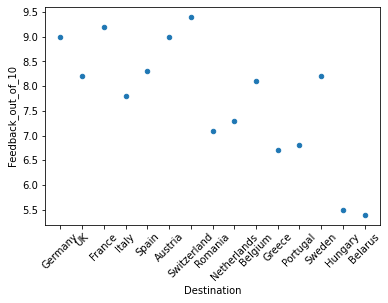

In [137]:
#Create a data visualisation diagram to show destination and highest scores?
df.plot.scatter(x='Destination', y='Feedback_out_of_10', rot=45)

<AxesSubplot:xlabel='Destination'>

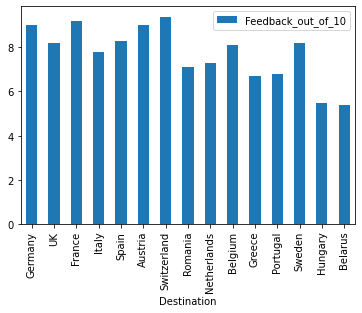

In [135]:
df.plot.bar(x='Destination', y='Feedback_out_of_10')

<AxesSubplot:xlabel='Destination'>

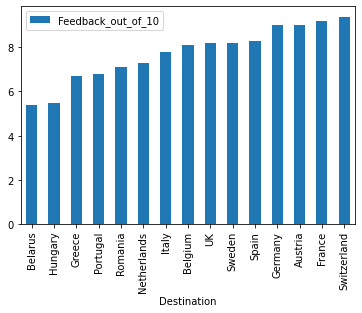

In [142]:
df.sort_values('Feedback_out_of_10', ascending=True).plot.bar(x='Destination', y='Feedback_out_of_10')